In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [30]:
data = datasets.load_iris()
#data

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Explore Data
    x axis is number of data per each class (50)
    y axis is data set in each class (0:150:50)


#### Petal Width

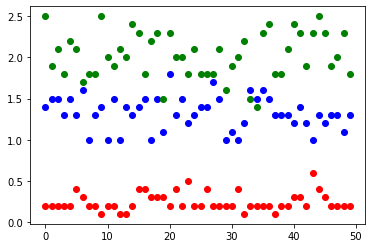

In [5]:
x = range(50)
plt.scatter(x, data.data[:50,3],color='red') # class 1
plt.scatter(x, data.data[50:100,3],color='blue') # class 2
plt.scatter(x,data.data[100:,3],color='green'); #class 3

#### Petal length

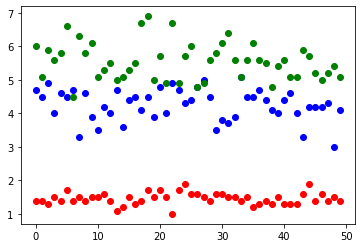

In [6]:
plt.scatter(x,data.data[:50,2],color = 'red') #class 1 
plt.scatter(x,data.data[50:100,2],color ='blue') #class2
plt.scatter(x,data.data[100:,2],color = 'green') #class3

### Saperate Train and Test data by Cross-Validation K-fold

In [7]:
from sklearn.model_selection import KFold
x= data["data"][:,2:4]
y= data.target[:]


K_f = KFold(n_splits=5, shuffle = True, random_state = 101)
K_f.get_n_splits(x)

5

In [8]:
for train_index, test_index in K_f.split(x):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
print('Train Shape X: {} Y : {}'.format(X_train.shape, Y_train.shape))
print('Test Shape X : {} Y : {}'.format(X_test.shape, Y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X : (30, 2) Y : (30,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
ans = knn.predict(X_test)

print (classification_report(Y_test,ans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



### Improve Accuracy by Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(data.data[:,2:4])

In [11]:
K_f = KFold(n_splits=5, shuffle = True, random_state = 101)
K_f.get_n_splits(x_new)

for train_index, test_index in K_f.split(x_new):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
print('Train Shape X: {} Y : {}'.format(X_train.shape, Y_train.shape))
print('Test Shape X : {} Y : {}'.format(X_test.shape, Y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X : (30, 2) Y : (30,)


In [12]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
ans = knn.predict(X_test)

print (classification_report(Y_test,ans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



### Tuning Hyperparameter

find n_neighbors from 1 to 10 using GrideSearchCV

GrideSearchCV include as follows:
- Machine Learning Model(knn)
- Hyper parameter with desired range
- number of testing rounds

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11)}
knn_best = GridSearchCV(knn, parameters, cv = 5)
knn_best.fit(X_train, Y_train)
knn_best.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [15]:
ans = knn_best.predict(X_test)

print (classification_report(Y_test,ans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Test

In [29]:
ans = knn.predict([[1.4, 0.2],[5.1, 1.8],[5.5, 3.3]])
ans

array([0, 2, 2])